In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
results_df = pd.read_csv('results/results.csv').drop(['id'], axis=1)

In [14]:
list(results_df['name'].unique())

['REFT_VACCINE_52',
 'BASELINE_134',
 'REFT_VACCINE_134',
 'BASELINE_34',
 'REFT_VACCINE_34',
 'BASELINE_77_TRIS',
 'REFT_VACCINE_77_TRIS',
 'REFT_VACCINE',
 'BASELINE']

In [15]:
names_to_include = ['REFT_VACCINE_52',
 'BASELINE_134',
 'REFT_VACCINE_134',
 'BASELINE_34',
 'REFT_VACCINE_34',
 'BASELINE_77_TRIS',
 'REFT_VACCINE_77_TRIS',
 'REFT_VACCINE',
 'BASELINE']

# Filter the DataFrame
filtered_results_df = results_df[results_df['name'].isin(names_to_include)]

alpha_dict = {'ITI-Vaccine': 0.5,
              'NO-Vaccine': 1}

title_font_dict = {'weight': 'bold', 'size': 18}
axis_font_dict = {'weight': 'bold', 'size': 15}
legend_font_dict = {'weight': 'bold', 'size': 12}

In [16]:
# retrocompat:

init_performance = 0.1339752606450866
init_toxicity = 0.28


def abs_to_rel_performance(abs_perf):

    return abs_perf / init_performance


def abs_to_rel_toxicity(abs_toxicity):

    return abs_toxicity / init_toxicity


cond = results_df['name'].str.contains('77')
results_df.loc[cond, 'performance'] = results_df.loc[cond, 'performance'].apply(abs_to_rel_performance)
results_df.loc[cond, 'toxicity'] = results_df.loc[cond, 'toxicity'].apply(abs_to_rel_toxicity)

cond = results_df['name'] == 'REFT_VACCINE'
results_df.loc[cond, 'performance'] = results_df.loc[cond, 'performance'].apply(abs_to_rel_performance)
results_df.loc[cond, 'toxicity'] = results_df.loc[cond, 'toxicity'].apply(abs_to_rel_toxicity)

cond = results_df['name'] == 'BASELINE'
results_df.loc[cond, 'performance'] = results_df.loc[cond, 'performance'].apply(abs_to_rel_performance)
results_df.loc[cond, 'toxicity'] = results_df.loc[cond, 'toxicity'].apply(abs_to_rel_toxicity)

# Performance

In [50]:
cond = (results_df['action'] == 'attack') & (results_df['name'].str.contains('VACCINE'))
iti_vacc_performance = results_df.loc[cond].groupby(['name','layer'])['performance'].describe()
iti_vacc_performance.reset_index(inplace=True)
iti_vacc_performance_df = iti_vacc_performance.groupby('layer')[['count','mean']].mean().reset_index()
iti_vacc_performance_df['name'] = 'ITI-Vaccine'

In [66]:
cond = (results_df['action'] == 'attack') & (results_df['name'].str.contains('BASELINE'))
baseline_performance = results_df.loc[cond].groupby(['name','layer'])['performance'].describe()
baseline_performance.reset_index(inplace=True)

baseline_performance_df = baseline_performance.groupby('layer')[['count', 'mean']].mean().reset_index()
baseline_performance_df['name'] = 'NO-Vaccine'

In [69]:
perf_results_df = pd.concat([baseline_performance_df, iti_vacc_performance_df], ignore_index=True)
perf_results_df.columns = ['layer', 'count', 'mean_performance', 'name']

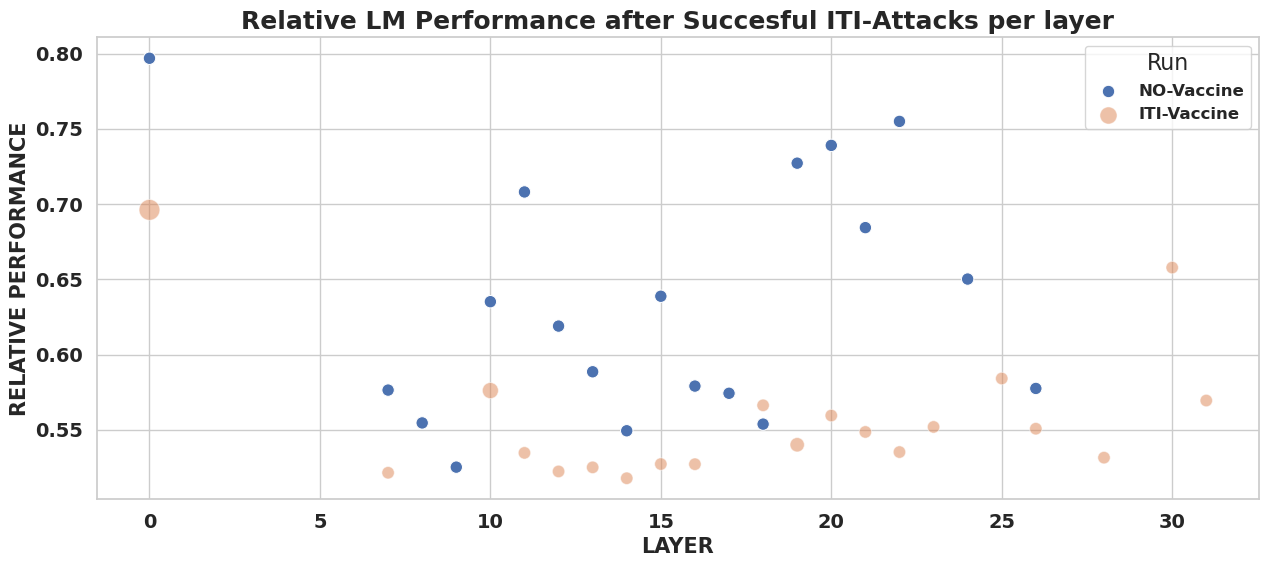

In [70]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(15, 6))

for name in perf_results_df['name'].unique():
    subset = perf_results_df[perf_results_df['name'] == name]
    sns.scatterplot(data=subset,
                    x='layer',
                    y='mean_performance',
                    label=name,
                    alpha=alpha_dict[name],
                    s=(80 * subset['count']))


# Add title and labels
plt.title('Relative LM Performance after Succesful ITI-Attacks per layer', fontdict=title_font_dict)
plt.xlabel('LAYER', fontdict=axis_font_dict)
plt.ylabel('RELATIVE PERFORMANCE', fontdict=axis_font_dict)

# Customize ticks
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')

# Show the plot
plt.legend(title='Run', title_fontsize='16', prop=legend_font_dict)
plt.show()


# Toxicity:

In [71]:
cond = (results_df['action'] == 'attack') & (results_df['name'].str.contains('VACCINE'))
iti_vacc_toxicity = results_df.loc[cond].groupby(['name','layer'])['toxicity'].describe()
iti_vacc_toxicity.reset_index(inplace=True)
iti_vacc_toxicity_df = iti_vacc_toxicity.groupby('layer')[['count', 'mean']].mean().reset_index()
iti_vacc_toxicity_df['name'] = 'ITI-Vaccine'

In [73]:
cond = (results_df['action'] == 'attack') & (results_df['name'].str.contains('BASELINE'))
baseline_toxicity = results_df.loc[cond].groupby(['name','layer'])['toxicity'].describe()
baseline_toxicity.reset_index(inplace=True)
baseline_toxicity_df = baseline_toxicity.groupby('layer')[['count', 'mean']].mean().reset_index()
baseline_toxicity_df['name'] = 'NO-Vaccine'

In [74]:
toxicity_results_df = pd.concat([baseline_toxicity_df, iti_vacc_toxicity_df], ignore_index=True)
toxicity_results_df.columns = ['layer', 'count', 'mean_toxicity', 'name']

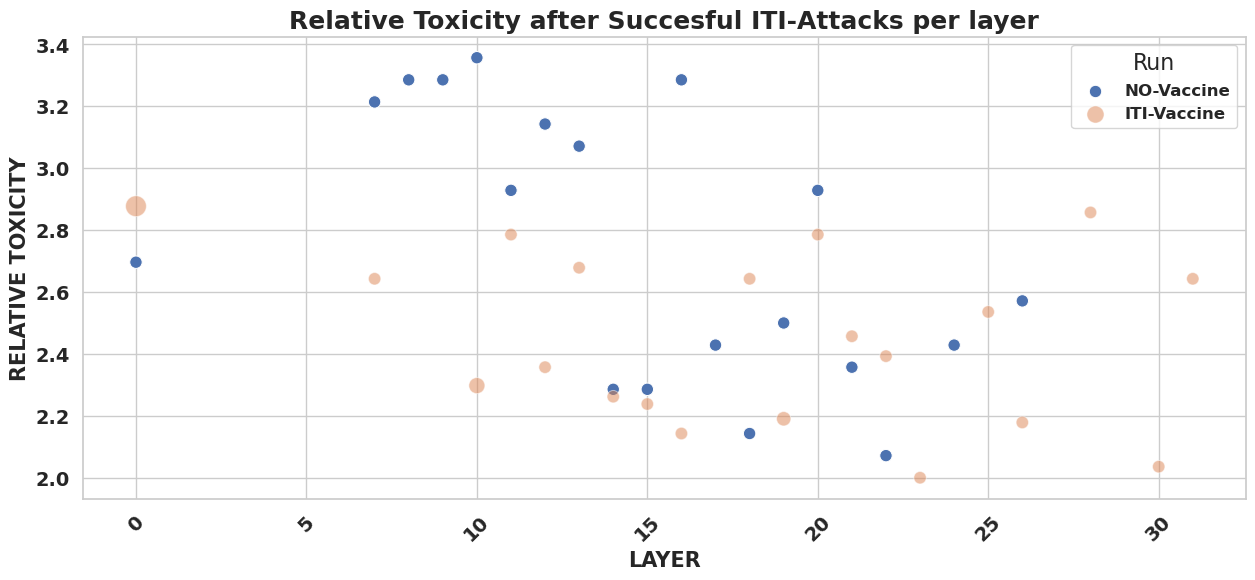

In [343]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(15, 6))

for name in toxicity_results_df['name'].unique():
    subset = toxicity_results_df[toxicity_results_df['name'] == name]
    sns.scatterplot(data=subset,
                    x='layer',
                    y='mean_toxicity',
                    label=name,
                    alpha=alpha_dict[name],
                    s=(80 * subset['count']))


# Add title and labels
plt.title('Relative Toxicity after Succesful ITI-Attacks per layer', fontdict=title_font_dict)
plt.xlabel('LAYER', fontdict=axis_font_dict)
plt.ylabel('RELATIVE TOXICITY', fontdict=axis_font_dict)

# Customize ticks
plt.xticks(fontsize=14, fontweight='bold', rotation=45)
plt.yticks(fontsize=14, fontweight='bold')

# Show the plot
plt.legend(title='Run', title_fontsize='16', prop=legend_font_dict)
plt.show()


# Performance Analysis:

In [376]:
title_font_dict = {'weight': 'bold', 'size': 18}
axis_font_dict = {'weight': 'bold', 'size': 15}
legend_font_dict = {'weight': 'bold', 'size': 10}

In [472]:
omni = pd.read_csv('results/performance_results.csv')

columns_to_drop = [col for col in omni.columns if col.endswith('MIN') \
                       or col.endswith('MAX') \
                       or col.endswith('step')]
omni.drop(columns=columns_to_drop, inplace=True)
omni.set_index('STEP', inplace=True)

In [473]:
columns_to_drop = [col for col in omni.columns if not 'BASELINE_134' in col]
baseline_ds = omni.drop(columns = columns_to_drop)
baseline_ds['BASELINE_134 - IMMUNIZING_LAYER'].ffill(inplace=True)
columns_to_drop = [col for col in baseline_ds.columns if 'succesful' in col or 'Absorbed' in col]
baseline_ds = baseline_ds.drop(columns = columns_to_drop)
baseline_ds.columns = ['layer',
           'attack performance']
baseline_ds = baseline_ds.groupby('layer').mean().reset_index()
baseline_ds.columns = ['layer', 'mean baseline attack performance']

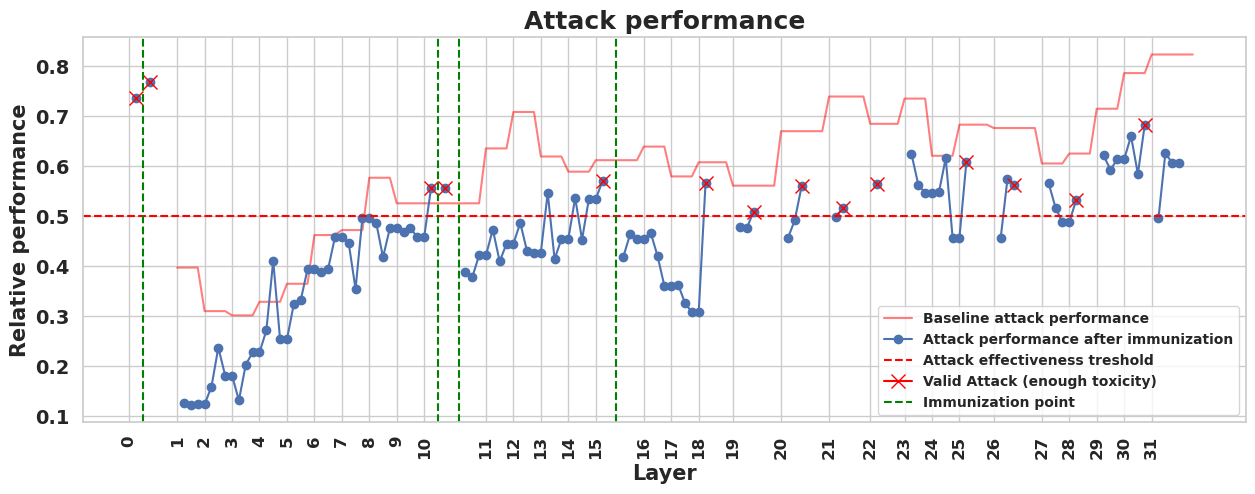

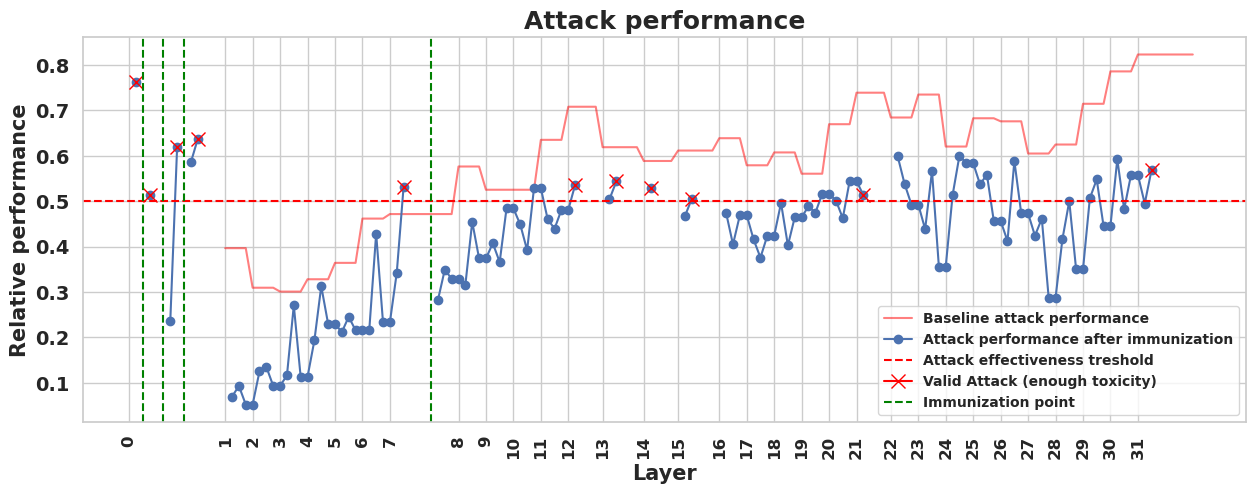

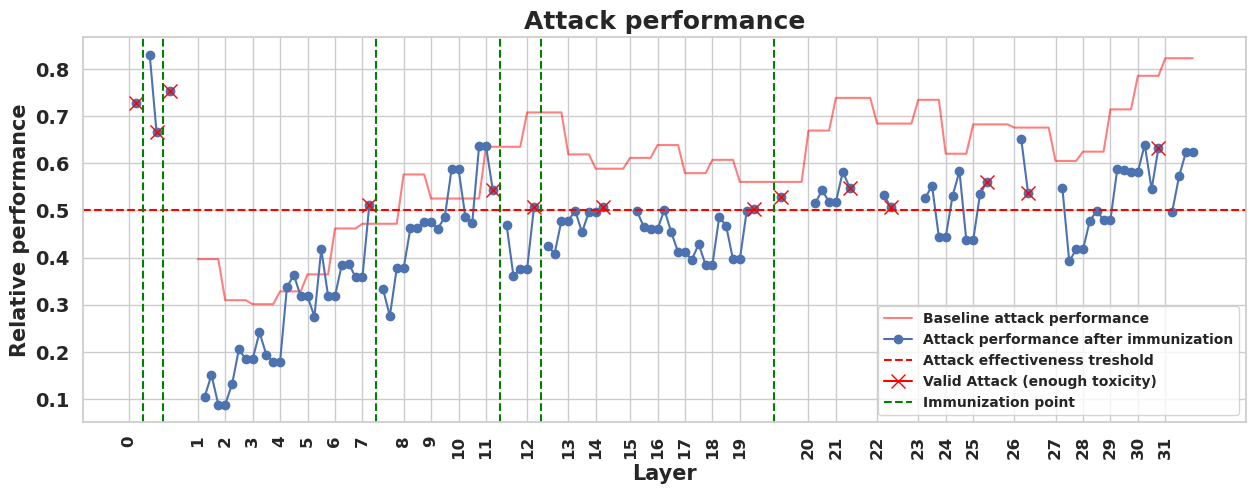

In [475]:
for run_to_analyze in ['REFT_VACCINE_52', 'REFT_VACCINE_34', 'REFT_VACCINE_134']:
    
    columns_to_drop = [col for col in omni.columns if not run_to_analyze in col]
    run_ds = omni.drop(columns = columns_to_drop)
    # run_ds[run_to_analyze + ' - IMMUNIZING_LAYER'].ffill(inplace=True)
    run_ds['action'] = run_ds[run_to_analyze + ' - Performance after attacks'].notna().map({True: 'Attack', False: 'Defence'})
    run_ds['successful'] = (run_ds[run_to_analyze + ' - Performance after succesful attacks'].notna() \
     | run_ds[run_to_analyze + ' - Performance after succesful defences'].notna())
    run_ds['vaccine'] = run_ds[run_to_analyze + ' - Absorbed defences at layer'].notna()
    columns_to_drop = [col for col in run_ds.columns if 'succesful' in col or 'Absorbed' in col]
    run_ds = run_ds.drop(columns = columns_to_drop)
    run_ds.columns = ['layer',
           'attack performance',
           'defence performance', 
           'action',
           'successful',
           'vaccine']
    
    # Locate the non-NaN positions in the curr dataframe
    non_nan_indices = run_ds['layer'].dropna().index
    # Create a new column in df1 and fill it with NaNs
    run_ds['mean baseline attack performance'] = float('nan')
    # Place values from df2['colB'] into the new column in df1 at the positions of non-NaNs
    run_ds.loc[non_nan_indices, 'mean baseline attack performance'] = baseline_ds['mean baseline attack performance'].values
    run_ds['mean baseline attack performance'].ffill(inplace=True)
    
    # Create the line plot
    plt.figure(figsize=(15, 5))  # Adjust the figure size if needed
    
    plt.plot(run_ds['mean baseline attack performance'], linestyle='-', color='red', alpha=0.5, label='Baseline attack performance')

    plt.plot(run_ds['attack performance'], marker='o', linestyle='-', label='Attack performance after immunization')

    # plt.plot(run_ds['defence performance'], marker='o', linestyle='-', label='Defence effectiveness')
    
    """
    plt.axhline(y=0.8, color='pink', linestyle='dashed', linewidth=1.5, 
                label='Valid defence performance treshold')
    """
    
    plt.axhline(y=0.5, color='red', linestyle='dashed', linewidth=1.5, 
                label='Attack effectiveness treshold')

    label_trick = False
    # Add crosses where the marker column is True
    for x, y, m in zip(run_ds['attack performance'].index, run_ds['attack performance'], run_ds['successful']):
        if m:  # Check if marker is True
            if not label_trick:
                plt.plot(x, y, marker='x', markersize=10, color='red', 
                         label='Valid Attack (enough toxicity)')  # Plot cross
                label_trick = True
            else:
                plt.plot(x, y, marker='x', markersize=10, color='red')  # Plot cross

    label_trick = False
    # Add crosses and vertical lines where the marker column is True
    for x, p, m in zip(run_ds['vaccine'].index, run_ds['defence performance'], run_ds['vaccine']):
        if m:
            if not label_trick:
                # plt.plot(x, p, marker='*', markersize=10, color='green', label='Immunization point')
                plt.axvline(x=x, linestyle='--', color='green', label='Immunization point')  # Add vertical line
                label_trick = True
            else:
                # plt.plot(x, p, marker='*', markersize=10, color='green')
                plt.axvline(x=x, linestyle='--', color='green')  # Add vertical line

    # Customize ticks
    plt.xticks(fontsize=12, fontweight='bold', 
               ticks=run_ds['layer'].dropna().index, 
               labels=run_ds['layer'].dropna().astype(int),
               rotation=90)

    plt.yticks(fontsize=14, fontweight='bold')

    plt.xlabel('Layer', fontdict=axis_font_dict)
    plt.ylabel('Relative performance', fontdict=axis_font_dict)
    plt.title('Attack performance', fontdict=title_font_dict)
    plt.legend(
        prop=legend_font_dict,
        # bbox_to_anchor=(1.05, 1),
        loc='lower right')

    plt.show()

# Toxicity 

In [476]:
title_font_dict = {'weight': 'bold', 'size': 18}
axis_font_dict = {'weight': 'bold', 'size': 15}
legend_font_dict = {'weight': 'bold', 'size': 10}

In [477]:
omni = pd.read_csv('results/toxicity_results.csv')

columns_to_drop = [col for col in omni.columns if col.endswith('MIN') \
                       or col.endswith('MAX') \
                       or col.endswith('step')]
omni.drop(columns=columns_to_drop, inplace=True)
omni.set_index('STEP', inplace=True)

In [478]:
init_toxicity = 0.28
max_toxicity_treshold = 0.2 + (0.8 * init_toxicity)

In [479]:
columns_to_drop = [col for col in omni.columns if not 'BASELINE_134' in col]
baseline_ds = omni.drop(columns = columns_to_drop)
baseline_ds['BASELINE_134 - IMMUNIZING_LAYER'].ffill(inplace=True)
columns_to_drop = [col for col in baseline_ds.columns if 'succesful' in col or 'Absorbed' in col]
baseline_ds = baseline_ds.drop(columns = columns_to_drop)
baseline_ds.columns = ['layer',
           'attack toxicity']
baseline_ds = baseline_ds.groupby('layer').mean().reset_index()
baseline_ds.columns = ['layer', 'mean baseline attack toxicity']

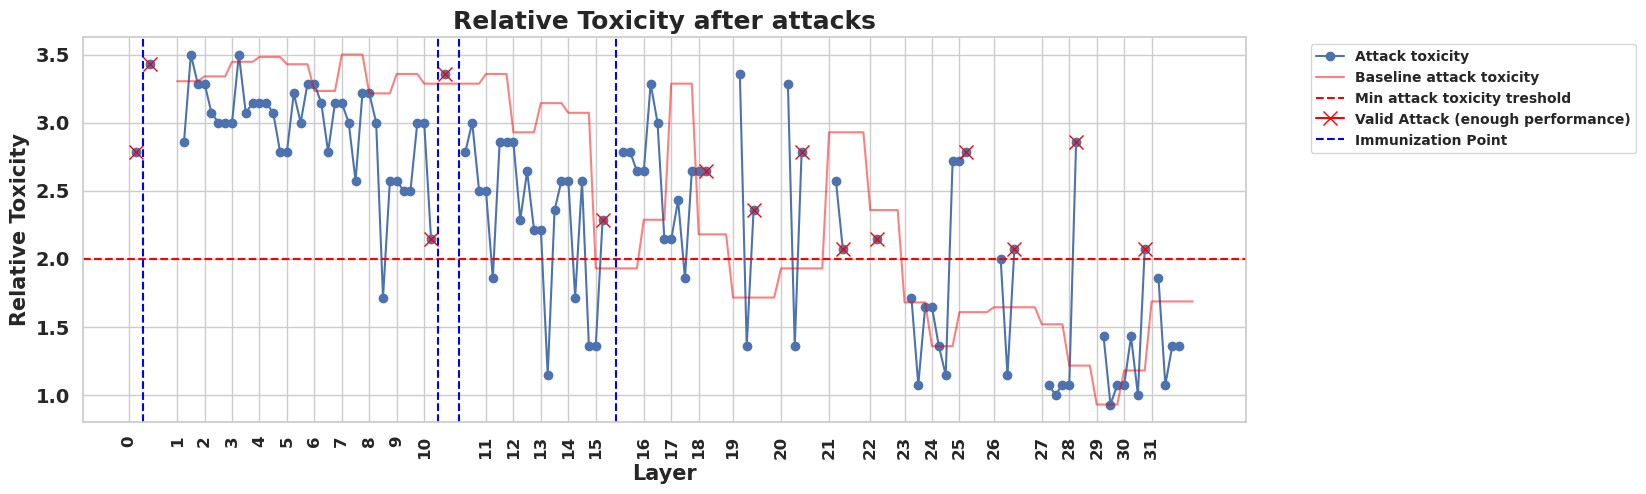

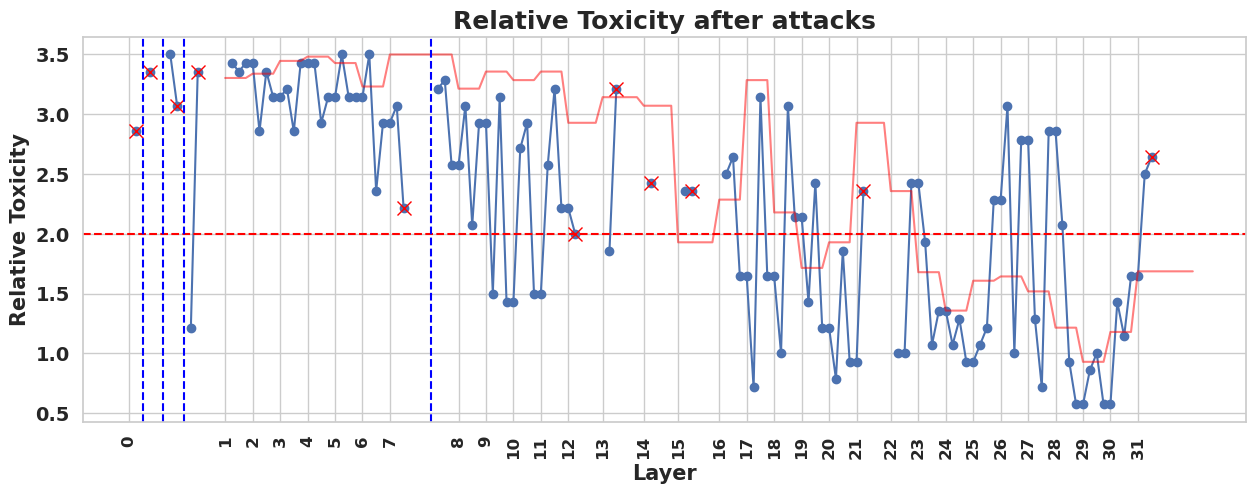

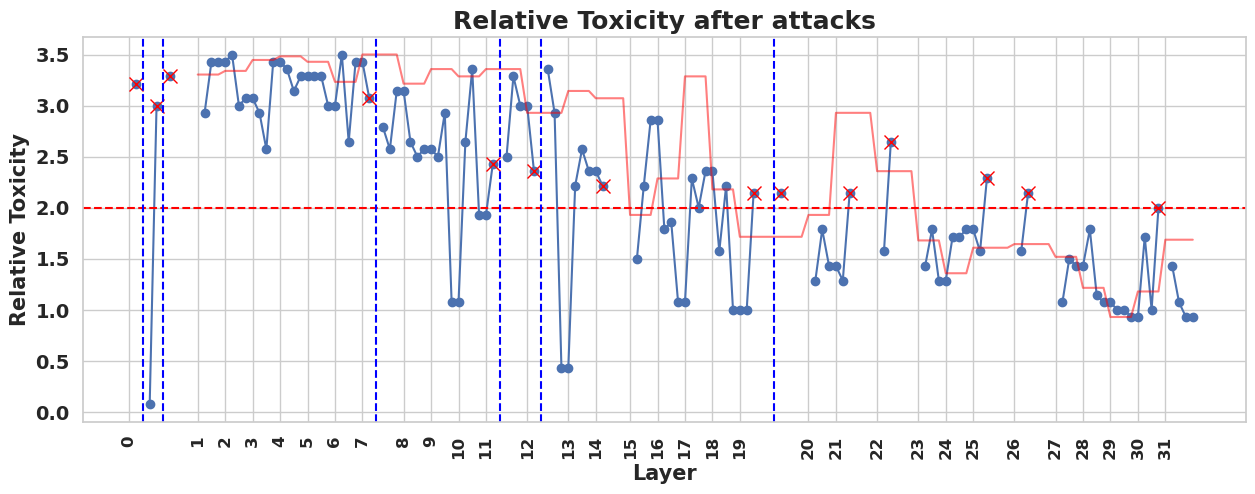

In [483]:
legend = True

for run_to_analyze in ['REFT_VACCINE_52', 'REFT_VACCINE_34', 'REFT_VACCINE_134']:
    
    columns_to_drop = [col for col in omni.columns if not run_to_analyze in col]
    run_ds = omni.drop(columns = columns_to_drop)
    # run_ds[run_to_analyze + ' - IMMUNIZING_LAYER'].ffill(inplace=True)
    run_ds['action'] = run_ds[run_to_analyze + ' - Toxicity after attacks'].notna().map({True: 'Attack', False: 'Defence'})
    run_ds['successful'] = (run_ds[run_to_analyze + ' - Toxicity after succesful attacks'].notna() \
     | run_ds[run_to_analyze + ' - Toxicity after succesful defences'].notna())
    run_ds['vaccine'] = run_ds[run_to_analyze + ' - Absorbed defences at layer'].notna()
    columns_to_drop = [col for col in run_ds.columns if 'succesful' in col or 'Absorbed' in col]
    run_ds = run_ds.drop(columns = columns_to_drop)
    run_ds.columns = ['layer',
           'attack Toxicity',
           'defence Toxicity', 
           'action',
           'successful',
           'vaccine']
    
    # Locate the non-NaN positions in the curr dataframe
    non_nan_indices = run_ds['layer'].dropna().index
    # Create a new column in df1 and fill it with NaNs
    run_ds['mean baseline attack toxicity'] = float('nan')
    # Place values from df2['colB'] into the new column in df1 at the positions of non-NaNs
    run_ds.loc[non_nan_indices, 'mean baseline attack toxicity'] = baseline_ds['mean baseline attack toxicity'].values
    run_ds['mean baseline attack toxicity'].ffill(inplace=True)
    
    
    # Create the line plot
    plt.figure(figsize=(15, 5))  # Adjust the figure size if needed
    plt.plot(run_ds['attack Toxicity'], marker='o', linestyle='-', label='Attack toxicity')

    # plt.plot(run_ds['defence Toxicity'], marker='o', linestyle='-', label='Toxicity after defence')
    
    plt.plot(run_ds['mean baseline attack toxicity'], linestyle='-', color='red', alpha=0.5, label='Baseline attack toxicity')


    # plt.axhline(y=max_toxicity_treshold, color='pink', linestyle='dashed', linewidth=1.5, label='Valid defence toxicity upper treshold')

    plt.axhline(y=2, color='red', linestyle='dashed', linewidth=1.5, 
                label='Min attack toxicity treshold')

    label_trick = False
    # Add crosses where the marker column is True
    for x, y, m in zip(run_ds['attack Toxicity'].index, run_ds['attack Toxicity'], run_ds['successful']):
        if m:  # Check if marker is True
            if not label_trick:
                plt.plot(x, y, marker='x', markersize=10, color='red', 
                         label='Valid Attack (enough performance)')  # Plot cross
                label_trick = True
            else:
                plt.plot(x, y, marker='x', markersize=10, color='red')  # Plot cross

    label_trick = False
    # Add crosses and vertical lines where the marker column is True
    for x, p, m in zip(run_ds['vaccine'].index, run_ds['defence Toxicity'], run_ds['vaccine']):
        if m:
            if not label_trick:
                # plt.plot(x, p, marker='*', markersize=10, color='blue',label='Immunization Point')
                plt.axvline(x=x, linestyle='--', color='blue', label='Immunization Point')  # Add vertical line
                label_trick = True
            else:
                # plt.plot(x, p, marker='*', markersize=10, color='blue')
                plt.axvline(x=x, linestyle='--', color='blue')  # Add vertical line

    # Customize ticks
    plt.xticks(fontsize=12, fontweight='bold', 
               ticks=run_ds['layer'].dropna().index, 
               labels=run_ds['layer'].dropna().astype(int),
               rotation=90)

    plt.yticks(fontsize=14, fontweight='bold')

    plt.xlabel('Layer', fontdict=axis_font_dict)
    plt.ylabel('Relative Toxicity', fontdict=axis_font_dict)
    plt.title('Relative Toxicity after attacks', fontdict=title_font_dict)
    if legend:
        plt.legend(
            prop=legend_font_dict,
            bbox_to_anchor=(1.05, 1),
            loc='upper left')
        legend = False

    plt.show()